In [1]:
# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support
from torch.utils.data import DataLoader, Dataset


# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

import ml_runmanager as runmanager
import ml_neuralnetwork as neuralnetwork
import ml_dataloader as dataloader
import ml_plotting as plotting

from importlib import reload
reload(runmanager)
reload(neuralnetwork)
reload(dataloader)
reload(plotting)

plt.style.use('ggplot')


In [2]:
# initialize parameters
batch_size = 100
max_epoch = 80
learning_rate = 0.001
valid_ratio = 0.2
num_classes = 10
input_size = 1*28*28
weight_decay = 1e-3
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cmap = None

DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# default transform
train_loader, val_loader, test_loader  = dataloader.fashion_mnist_data_loaders(batch_size, valid_ratio)

# normalized transform
train_loader_no, val_loader_no, test_loader_no = dataloader.fashion_mnist_data_loaders(batch_size, valid_ratio, normalized=True)

# data augmentation
train_loader_au, val_loader_au, test_loader_au  = dataloader.fashion_mnist_data_loaders(batch_size, valid_ratio, normalized=False, augment_transform=True)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!





/opt/conda/conda-bld/pytorch_1591914880026/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Epoch 0
Training dataset: loss = 0.7295 || accuracy = 0.7649
Validation dataset: loss = 0.5562 || accuracy = 0.8134
Epoch 1
Training dataset: loss = 0.5165 || accuracy = 0.8269
Validation dataset: loss = 0.4947 || accuracy = 0.8337
Epoch 2
Training dataset: loss = 0.4742 || accuracy = 0.8408
Validation dataset: loss = 0.4749 || accuracy = 0.8359
Epoch 3
Training dataset: loss = 0.4529 || accuracy = 0.8474
Validation dataset: loss = 0.4564 || accuracy = 0.8448
Epoch 4
Training dataset: loss = 0.4384 || accuracy = 0.8508
Validation dataset: loss = 0.4463 || accuracy = 0.8458
Epoch 5
Training dataset: loss = 0.4277 || accuracy = 0.8547
Validation dataset: loss = 0.4500 || accuracy = 0.8434
Epoch 6
Training dataset: loss = 0.4197 || accuracy = 0.8579
Validation dataset: loss = 0.4340 || accuracy = 0.8498
Epoch 7
Training dataset: loss = 0.4136 || accuracy = 0.8593
Validation dataset: loss = 0.4387 || accuracy = 0.8461
Epoch 8
Training dataset: loss = 0.4089 || accuracy = 0.8599
Validation 

Epoch 71
Training dataset: loss = 0.3498 || accuracy = 0.8776
Validation dataset: loss = 0.4245 || accuracy = 0.8542
Epoch 72
Training dataset: loss = 0.3503 || accuracy = 0.8769
Validation dataset: loss = 0.4238 || accuracy = 0.8540
Epoch 73
Training dataset: loss = 0.3485 || accuracy = 0.8762
Validation dataset: loss = 0.4281 || accuracy = 0.8526
Epoch 74
Training dataset: loss = 0.3486 || accuracy = 0.8770
Validation dataset: loss = 0.4246 || accuracy = 0.8549
Epoch 75
Training dataset: loss = 0.3476 || accuracy = 0.8781
Validation dataset: loss = 0.4244 || accuracy = 0.8542
Epoch 76
Training dataset: loss = 0.3476 || accuracy = 0.8774
Validation dataset: loss = 0.4272 || accuracy = 0.8533
Epoch 77
Training dataset: loss = 0.3468 || accuracy = 0.8783
Validation dataset: loss = 0.4282 || accuracy = 0.8541
Epoch 78
Training dataset: loss = 0.3482 || accuracy = 0.8779
Validation dataset: loss = 0.4290 || accuracy = 0.8526
Epoch 79
Training dataset: loss = 0.3478 || accuracy = 0.8774
Va

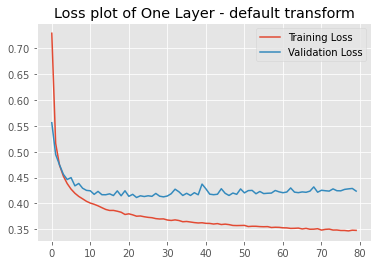

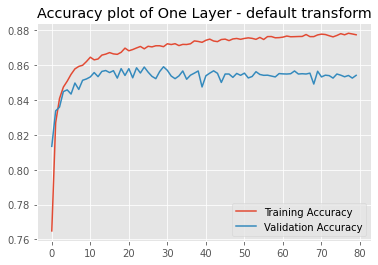

In [5]:
#1 train One Layer Linear classification network with default transform data

model1 = neuralnetwork.OneLayer(input_size, num_classes).to(DEVICE)

%time train_loss_h1, train_acc_h1, val_loss_h1, val_acc_h1, val_label1, val_predicted1 = runmanager.model_run(model1, train_loader, val_loader, max_epoch, learning_rate, DEVICE)

plotting.plot('One Layer - default transform', train_loss_h1, train_acc_h1, val_loss_h1, val_acc_h1)


In [ ]:
# ------------------------------------------------------

Epoch 0
Training dataset: loss = 0.5512 || accuracy = 0.8099
Validation dataset: loss = 0.4631 || accuracy = 0.8412
Epoch 1
Training dataset: loss = 0.4450 || accuracy = 0.8462
Validation dataset: loss = 0.4416 || accuracy = 0.8542
Epoch 2
Training dataset: loss = 0.4257 || accuracy = 0.8530
Validation dataset: loss = 0.4245 || accuracy = 0.8573
Epoch 3
Training dataset: loss = 0.4131 || accuracy = 0.8558
Validation dataset: loss = 0.4312 || accuracy = 0.8533
Epoch 4
Training dataset: loss = 0.4060 || accuracy = 0.8582
Validation dataset: loss = 0.4266 || accuracy = 0.8572
Epoch 5
Training dataset: loss = 0.3985 || accuracy = 0.8611
Validation dataset: loss = 0.4248 || accuracy = 0.8545
Epoch 6
Training dataset: loss = 0.3943 || accuracy = 0.8623
Validation dataset: loss = 0.4303 || accuracy = 0.8542
Epoch 7
Training dataset: loss = 0.3931 || accuracy = 0.8629
Validation dataset: loss = 0.4283 || accuracy = 0.8548
Epoch 8
Training dataset: loss = 0.3891 || accuracy = 0.8641
Validation 

Epoch 71
Training dataset: loss = 0.3512 || accuracy = 0.8754
Validation dataset: loss = 0.4714 || accuracy = 0.8491
Epoch 72
Training dataset: loss = 0.3504 || accuracy = 0.8751
Validation dataset: loss = 0.4749 || accuracy = 0.8465
Epoch 73
Training dataset: loss = 0.3503 || accuracy = 0.8766
Validation dataset: loss = 0.4730 || accuracy = 0.8470
Epoch 74
Training dataset: loss = 0.3499 || accuracy = 0.8754
Validation dataset: loss = 0.4784 || accuracy = 0.8477
Epoch 75
Training dataset: loss = 0.3497 || accuracy = 0.8759
Validation dataset: loss = 0.4780 || accuracy = 0.8477
Epoch 76
Training dataset: loss = 0.3491 || accuracy = 0.8754
Validation dataset: loss = 0.4729 || accuracy = 0.8502
Epoch 77
Training dataset: loss = 0.3485 || accuracy = 0.8761
Validation dataset: loss = 0.4772 || accuracy = 0.8445
Epoch 78
Training dataset: loss = 0.3480 || accuracy = 0.8758
Validation dataset: loss = 0.4776 || accuracy = 0.8486
Epoch 79
Training dataset: loss = 0.3488 || accuracy = 0.8761
Va

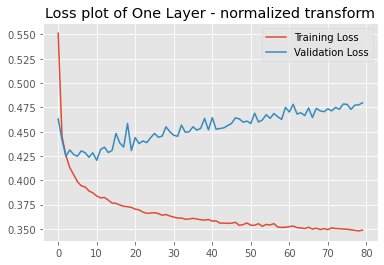

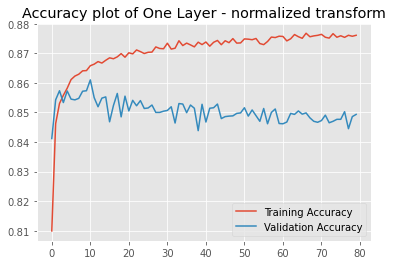

In [6]:
#2 train One Layer Linear classification network with normalized transform

model1 = neuralnetwork.OneLayer(input_size, num_classes).to(DEVICE)

%time train_loss_h1_no, train_acc_h1_no, val_loss_h1_no, val_acc_h1_no, _, _  = runmanager.model_run(model1, train_loader_no, val_loader_no, max_epoch, learning_rate, DEVICE)

plotting.plot('One Layer - normalized transform', train_loss_h1_no, train_acc_h1_no, val_loss_h1_no, val_acc_h1_no)


In [ ]:
# ------------------------------------------------------

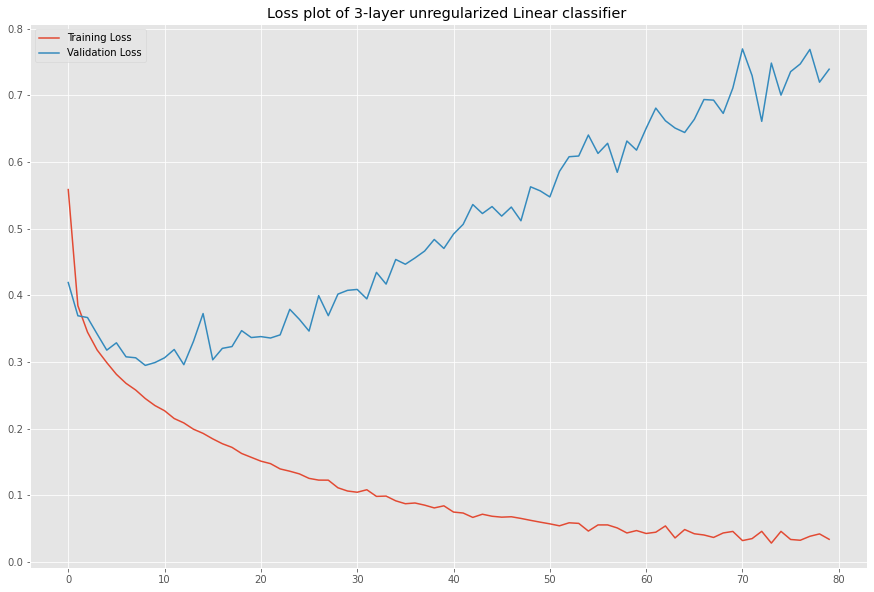

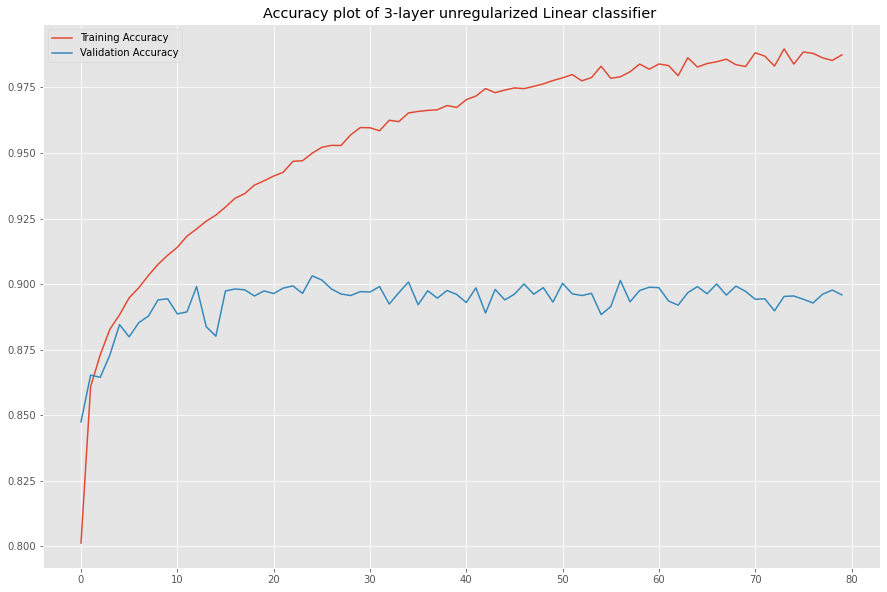

In [50]:
#3 train 3-layer unregularized Linear classifier 
model2 = neuralnetwork.unRegNN(input_size, num_classes).to(DEVICE)

%time train_loss_h2, train_acc_h2, val_loss_h2, val_acc_h2, _, _  = runmanager.model_run(model2, train_loader, val_loader, max_epoch, learning_rate, DEVICE)

plotting.plot('3-layer unregularized Linear classifier ', train_loss_h2, train_acc_h2, val_loss_h2, val_acc_h2)



In [ ]:
# -------------------------------------------------------

Epoch 0
Training dataset: loss = 0.5834 || accuracy = 0.7938
Validation dataset: loss = 0.4486 || accuracy = 0.8408
Epoch 1
Training dataset: loss = 0.4192 || accuracy = 0.8494
Validation dataset: loss = 0.4157 || accuracy = 0.8476
Epoch 2
Training dataset: loss = 0.3826 || accuracy = 0.8618
Validation dataset: loss = 0.3879 || accuracy = 0.8585
Epoch 3
Training dataset: loss = 0.3670 || accuracy = 0.8663
Validation dataset: loss = 0.3956 || accuracy = 0.8511
Epoch 4
Training dataset: loss = 0.3510 || accuracy = 0.8730
Validation dataset: loss = 0.3573 || accuracy = 0.8662
Epoch 5
Training dataset: loss = 0.3391 || accuracy = 0.8766
Validation dataset: loss = 0.3423 || accuracy = 0.8742
Epoch 6
Training dataset: loss = 0.3337 || accuracy = 0.8774
Validation dataset: loss = 0.3530 || accuracy = 0.8708
Epoch 7
Training dataset: loss = 0.3233 || accuracy = 0.8805
Validation dataset: loss = 0.3572 || accuracy = 0.8689
Epoch 8
Training dataset: loss = 0.3152 || accuracy = 0.8843
Validation 

Epoch 71
Training dataset: loss = 0.2416 || accuracy = 0.9126
Validation dataset: loss = 0.3137 || accuracy = 0.8853
Epoch 72
Training dataset: loss = 0.2377 || accuracy = 0.9135
Validation dataset: loss = 0.3023 || accuracy = 0.8908
Epoch 73
Training dataset: loss = 0.2362 || accuracy = 0.9141
Validation dataset: loss = 0.3564 || accuracy = 0.8738
Epoch 74
Training dataset: loss = 0.2365 || accuracy = 0.9136
Validation dataset: loss = 0.3033 || accuracy = 0.8908
Epoch 75
Training dataset: loss = 0.2392 || accuracy = 0.9138
Validation dataset: loss = 0.3070 || accuracy = 0.8888
Epoch 76
Training dataset: loss = 0.2354 || accuracy = 0.9143
Validation dataset: loss = 0.3034 || accuracy = 0.8927
Epoch 77
Training dataset: loss = 0.2383 || accuracy = 0.9143
Validation dataset: loss = 0.3041 || accuracy = 0.8922
Epoch 78
Training dataset: loss = 0.2360 || accuracy = 0.9148
Validation dataset: loss = 0.2989 || accuracy = 0.8916
Epoch 79
Training dataset: loss = 0.2357 || accuracy = 0.9148
Va

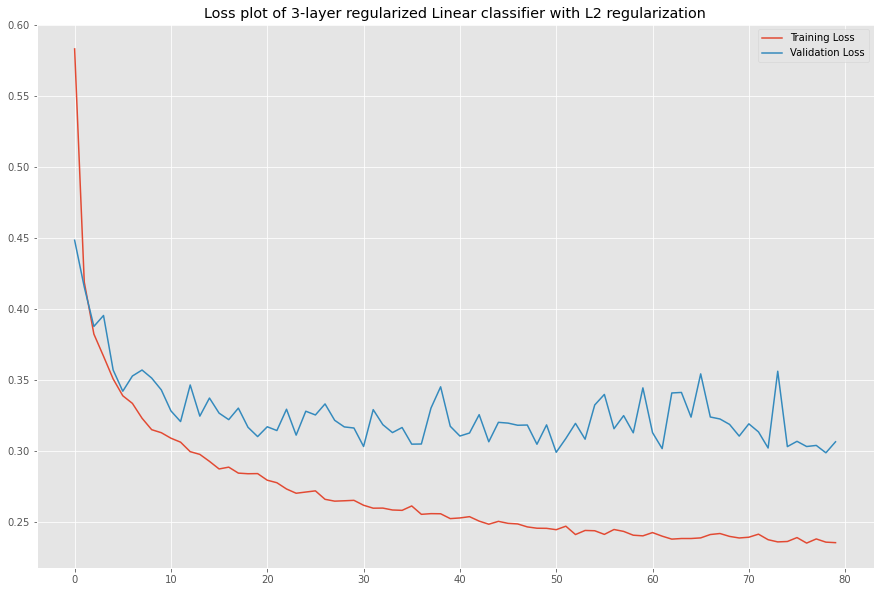

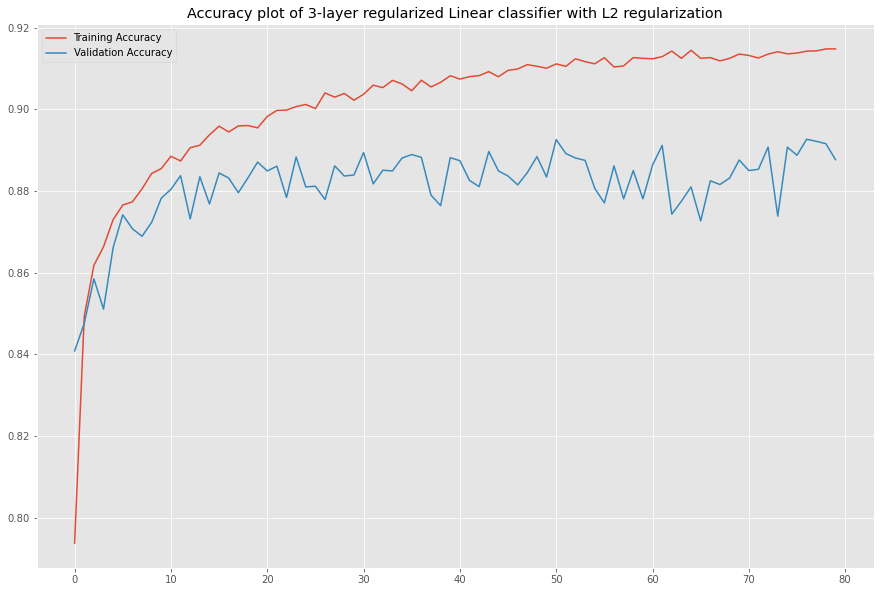

In [49]:
#4 train 3-layer regularized Linear classifier with L2 regularization
model3 = neuralnetwork.unRegNN(input_size, num_classes).to(DEVICE)

%time train_loss_h3, train_acc_h3, val_loss_h3, val_acc_h3, _, _  = runmanager.model_run(model3, train_loader, val_loader, max_epoch, learning_rate, DEVICE, weight_decay=weight_decay, l2reg=True)

plotting.plot('3-layer regularized Linear classifier with L2 regularization', train_loss_h3, train_acc_h3, val_loss_h3, val_acc_h3)


In [ ]:
# -------------------------------------------------------                     

Epoch 0
Training dataset: loss = 0.6623 || accuracy = 0.7575
Validation dataset: loss = 0.4367 || accuracy = 0.8388
Epoch 1
Training dataset: loss = 0.4805 || accuracy = 0.8251
Validation dataset: loss = 0.4139 || accuracy = 0.8469
Epoch 2
Training dataset: loss = 0.4504 || accuracy = 0.8336
Validation dataset: loss = 0.3805 || accuracy = 0.8558
Epoch 3
Training dataset: loss = 0.4338 || accuracy = 0.8389
Validation dataset: loss = 0.3738 || accuracy = 0.8566
Epoch 4
Training dataset: loss = 0.4154 || accuracy = 0.8474
Validation dataset: loss = 0.3639 || accuracy = 0.8680
Epoch 5
Training dataset: loss = 0.4030 || accuracy = 0.8510
Validation dataset: loss = 0.3393 || accuracy = 0.8765
Epoch 6
Training dataset: loss = 0.3974 || accuracy = 0.8527
Validation dataset: loss = 0.3408 || accuracy = 0.8716
Epoch 7
Training dataset: loss = 0.3885 || accuracy = 0.8554
Validation dataset: loss = 0.3473 || accuracy = 0.8736
Epoch 8
Training dataset: loss = 0.3788 || accuracy = 0.8584
Validation 

Epoch 71
Training dataset: loss = 0.2806 || accuracy = 0.8927
Validation dataset: loss = 0.2764 || accuracy = 0.9010
Epoch 72
Training dataset: loss = 0.2793 || accuracy = 0.8947
Validation dataset: loss = 0.2754 || accuracy = 0.9012
Epoch 73
Training dataset: loss = 0.2822 || accuracy = 0.8922
Validation dataset: loss = 0.2737 || accuracy = 0.9007
Epoch 74
Training dataset: loss = 0.2783 || accuracy = 0.8937
Validation dataset: loss = 0.2749 || accuracy = 0.9022
Epoch 75
Training dataset: loss = 0.2764 || accuracy = 0.8931
Validation dataset: loss = 0.2741 || accuracy = 0.9019
Epoch 76
Training dataset: loss = 0.2789 || accuracy = 0.8938
Validation dataset: loss = 0.2779 || accuracy = 0.9007
Epoch 77
Training dataset: loss = 0.2779 || accuracy = 0.8944
Validation dataset: loss = 0.2766 || accuracy = 0.9016
Epoch 78
Training dataset: loss = 0.2745 || accuracy = 0.8961
Validation dataset: loss = 0.2782 || accuracy = 0.8998
Epoch 79
Training dataset: loss = 0.2756 || accuracy = 0.8956
Va

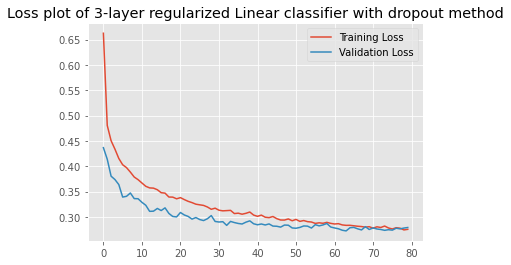

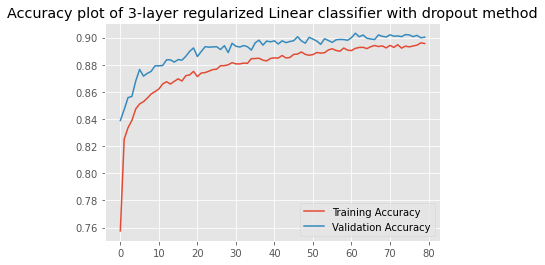

In [8]:
#5 train 3-layer regularized Linear classifier with dropout method
model4 = neuralnetwork.RegNN_dropout(input_size, num_classes).to(DEVICE)

%time train_loss_h4, train_acc_h4, val_loss_h4, val_acc_h4, _, _  = runmanager.model_run(model4, train_loader, val_loader, max_epoch, learning_rate, DEVICE)

plotting.plot('3-layer regularized Linear classifier with dropout method', train_loss_h4, train_acc_h4, val_loss_h4, val_acc_h4)

In [ ]:
# --------------------------------------------------------

Epoch 0
Training dataset: loss = 0.6663 || accuracy = 0.7492
Validation dataset: loss = 0.4637 || accuracy = 0.8370
Epoch 1
Training dataset: loss = 0.4050 || accuracy = 0.8494
Validation dataset: loss = 0.3613 || accuracy = 0.8637
Epoch 2
Training dataset: loss = 0.3279 || accuracy = 0.8769
Validation dataset: loss = 0.3148 || accuracy = 0.8831
Epoch 3
Training dataset: loss = 0.2890 || accuracy = 0.8915
Validation dataset: loss = 0.2850 || accuracy = 0.8936
Epoch 4
Training dataset: loss = 0.2570 || accuracy = 0.9032
Validation dataset: loss = 0.2872 || accuracy = 0.8947
Epoch 5
Training dataset: loss = 0.2365 || accuracy = 0.9113
Validation dataset: loss = 0.2546 || accuracy = 0.9039
Epoch 6
Training dataset: loss = 0.2141 || accuracy = 0.9194
Validation dataset: loss = 0.2491 || accuracy = 0.9081
Epoch 7
Training dataset: loss = 0.1953 || accuracy = 0.9269
Validation dataset: loss = 0.2434 || accuracy = 0.9124
Epoch 8
Training dataset: loss = 0.1826 || accuracy = 0.9307
Validation 

Epoch 71
Training dataset: loss = 0.0179 || accuracy = 0.9938
Validation dataset: loss = 0.6502 || accuracy = 0.9146
Epoch 72
Training dataset: loss = 0.0136 || accuracy = 0.9952
Validation dataset: loss = 0.7244 || accuracy = 0.9116
Epoch 73
Training dataset: loss = 0.0126 || accuracy = 0.9955
Validation dataset: loss = 0.6569 || accuracy = 0.9181
Epoch 74
Training dataset: loss = 0.0157 || accuracy = 0.9946
Validation dataset: loss = 0.6444 || accuracy = 0.9148
Epoch 75
Training dataset: loss = 0.0163 || accuracy = 0.9947
Validation dataset: loss = 0.6851 || accuracy = 0.9155
Epoch 76
Training dataset: loss = 0.0117 || accuracy = 0.9961
Validation dataset: loss = 0.7323 || accuracy = 0.9153
Epoch 77
Training dataset: loss = 0.0169 || accuracy = 0.9944
Validation dataset: loss = 0.5932 || accuracy = 0.9113
Epoch 78
Training dataset: loss = 0.0122 || accuracy = 0.9960
Validation dataset: loss = 0.6673 || accuracy = 0.9143
Epoch 79
Training dataset: loss = 0.0106 || accuracy = 0.9965
Va

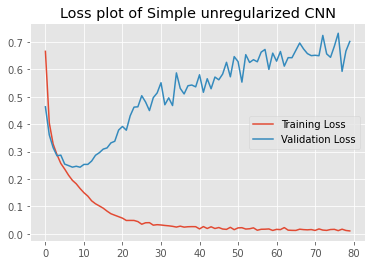

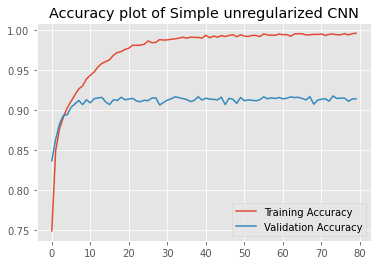

In [9]:
#6 train simple unregularized CNN 
model5 = neuralnetwork.Simple_unReg_CNN(num_classes).to(DEVICE)

%time train_loss_h5, train_acc_h5, val_loss_h5, val_acc_h5, _, _  = runmanager.model_run(model5, train_loader, val_loader, max_epoch, learning_rate, DEVICE)

plotting.plot('Simple unregularized CNN', train_loss_h5, train_acc_h5, val_loss_h5, val_acc_h5)

In [ ]:
# --------------------------------------------------------

Epoch 0
Training dataset: loss = 0.7830 || accuracy = 0.7014
Validation dataset: loss = 0.4892 || accuracy = 0.8123
Epoch 1
Training dataset: loss = 0.4880 || accuracy = 0.8185
Validation dataset: loss = 0.3933 || accuracy = 0.8568
Epoch 2
Training dataset: loss = 0.4102 || accuracy = 0.8495
Validation dataset: loss = 0.3426 || accuracy = 0.8710
Epoch 3
Training dataset: loss = 0.3666 || accuracy = 0.8665
Validation dataset: loss = 0.3000 || accuracy = 0.8874
Epoch 4
Training dataset: loss = 0.3374 || accuracy = 0.8751
Validation dataset: loss = 0.2790 || accuracy = 0.8977
Epoch 5
Training dataset: loss = 0.3175 || accuracy = 0.8834
Validation dataset: loss = 0.2741 || accuracy = 0.8968
Epoch 6
Training dataset: loss = 0.2989 || accuracy = 0.8905
Validation dataset: loss = 0.2667 || accuracy = 0.9014
Epoch 7
Training dataset: loss = 0.2872 || accuracy = 0.8940
Validation dataset: loss = 0.2532 || accuracy = 0.9056
Epoch 8
Training dataset: loss = 0.2769 || accuracy = 0.8975
Validation 

Epoch 71
Training dataset: loss = 0.1082 || accuracy = 0.9600
Validation dataset: loss = 0.2585 || accuracy = 0.9205
Epoch 72
Training dataset: loss = 0.1090 || accuracy = 0.9598
Validation dataset: loss = 0.2466 || accuracy = 0.9249
Epoch 73
Training dataset: loss = 0.1069 || accuracy = 0.9597
Validation dataset: loss = 0.2481 || accuracy = 0.9247
Epoch 74
Training dataset: loss = 0.1081 || accuracy = 0.9598
Validation dataset: loss = 0.2441 || accuracy = 0.9287
Epoch 75
Training dataset: loss = 0.1042 || accuracy = 0.9611
Validation dataset: loss = 0.2353 || accuracy = 0.9264
Epoch 76
Training dataset: loss = 0.1048 || accuracy = 0.9606
Validation dataset: loss = 0.2452 || accuracy = 0.9252
Epoch 77
Training dataset: loss = 0.1030 || accuracy = 0.9628
Validation dataset: loss = 0.2446 || accuracy = 0.9248
Epoch 78
Training dataset: loss = 0.1018 || accuracy = 0.9617
Validation dataset: loss = 0.2402 || accuracy = 0.9257
Epoch 79
Training dataset: loss = 0.1007 || accuracy = 0.9624
Va

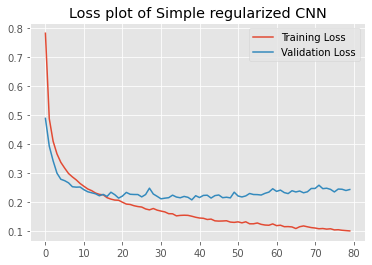

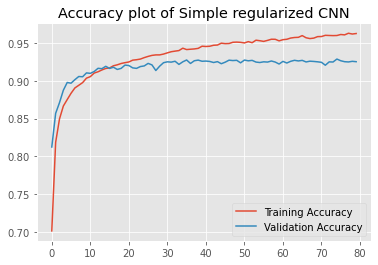

In [10]:
#7 train simple regularized CNN 
model6 = neuralnetwork.Simple_Reg_CNN(num_classes).to(DEVICE)

%time train_loss_h6, train_acc_h6, val_loss_h6, val_acc_h6, val_label6, val_predicted6  = runmanager.model_run(model6, train_loader, val_loader, max_epoch, learning_rate, DEVICE)

plotting.plot('Simple regularized CNN', train_loss_h6, train_acc_h6, val_loss_h6, val_acc_h6)

In [ ]:
# --------------------------------------------------------

Epoch 0
Training dataset: loss = 0.9472 || accuracy = 0.6372
Validation dataset: loss = 0.5926 || accuracy = 0.7683
Epoch 1
Training dataset: loss = 0.6524 || accuracy = 0.7480
Validation dataset: loss = 0.5150 || accuracy = 0.7937
Epoch 2
Training dataset: loss = 0.5805 || accuracy = 0.7756
Validation dataset: loss = 0.4757 || accuracy = 0.8182
Epoch 3
Training dataset: loss = 0.5288 || accuracy = 0.7980
Validation dataset: loss = 0.4280 || accuracy = 0.8442
Epoch 4
Training dataset: loss = 0.4996 || accuracy = 0.8132
Validation dataset: loss = 0.3890 || accuracy = 0.8538
Epoch 5
Training dataset: loss = 0.4686 || accuracy = 0.8245
Validation dataset: loss = 0.3620 || accuracy = 0.8628
Epoch 6
Training dataset: loss = 0.4473 || accuracy = 0.8335
Validation dataset: loss = 0.3580 || accuracy = 0.8685
Epoch 7
Training dataset: loss = 0.4291 || accuracy = 0.8418
Validation dataset: loss = 0.3263 || accuracy = 0.8793
Epoch 8
Training dataset: loss = 0.4203 || accuracy = 0.8451
Validation 

Epoch 71
Training dataset: loss = 0.2854 || accuracy = 0.8947
Validation dataset: loss = 0.2329 || accuracy = 0.9137
Epoch 72
Training dataset: loss = 0.2865 || accuracy = 0.8946
Validation dataset: loss = 0.2327 || accuracy = 0.9147
Epoch 73
Training dataset: loss = 0.2909 || accuracy = 0.8928
Validation dataset: loss = 0.2398 || accuracy = 0.9136
Epoch 74
Training dataset: loss = 0.2808 || accuracy = 0.8968
Validation dataset: loss = 0.2443 || accuracy = 0.9092
Epoch 75
Training dataset: loss = 0.2845 || accuracy = 0.8963
Validation dataset: loss = 0.2327 || accuracy = 0.9176
Epoch 76
Training dataset: loss = 0.2823 || accuracy = 0.8952
Validation dataset: loss = 0.2250 || accuracy = 0.9210
Epoch 77
Training dataset: loss = 0.2832 || accuracy = 0.8979
Validation dataset: loss = 0.2295 || accuracy = 0.9154
Epoch 78
Training dataset: loss = 0.2829 || accuracy = 0.8962
Validation dataset: loss = 0.2258 || accuracy = 0.9196
Epoch 79
Training dataset: loss = 0.2806 || accuracy = 0.8986
Va

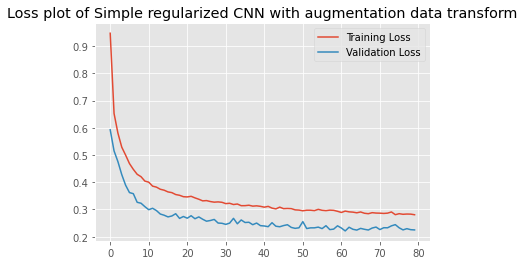

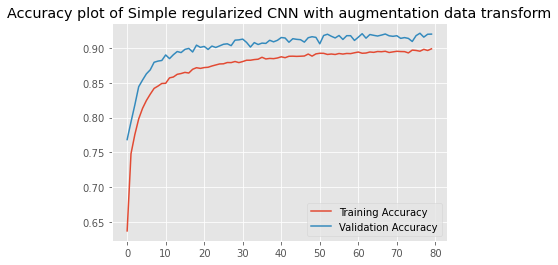

In [11]:
#8 train simple regularized CNN with augmentation data transform
model7 = neuralnetwork.Simple_Reg_CNN(num_classes).to(DEVICE)

%time train_loss_h7, train_acc_h7, val_loss_h7, val_acc_h7, _, _  = runmanager.model_run(model7, train_loader_au, val_loader_au, max_epoch, learning_rate, DEVICE)

plotting.plot('Simple regularized CNN with augmentation data transform', train_loss_h7, train_acc_h7, val_loss_h7, val_acc_h7)

In [ ]:
# --------------------------------------------------------

In [45]:
def all_model_plot(all_models_val_loss, all_labels, title):
    for i in range(len(all_models_val_loss)):
        plt.plot(all_models_val_loss[i], label = all_labels[i])
    plt.title(title)
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
    plt.legend()
    plt.rcParams["figure.figsize"] = (15,10)
    plt.show()
    

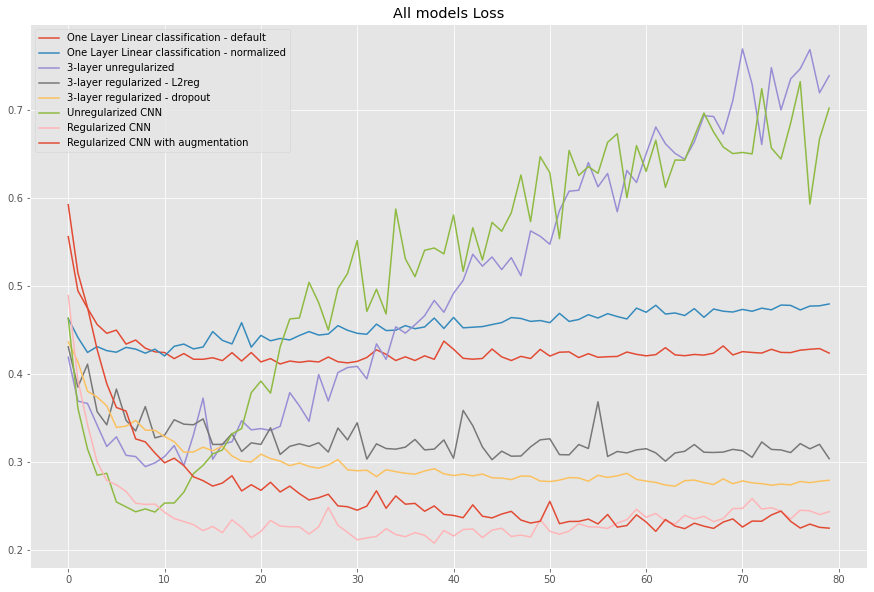

In [48]:
all_models_val_loss = [val_loss_h1, val_loss_h1_no, val_loss_h2, val_loss_h3, val_loss_h4, val_loss_h5, val_loss_h6, val_loss_h7]
all_models_val_acc = [val_acc_h1, val_acc_h1_no, val_acc_h2, val_acc_h3, val_acc_h4, val_acc_h5, val_acc_h6, val_acc_h7]

all_labels = ['One Layer Linear classification - default', 'One Layer Linear classification - normalized', 
              '3-layer unregularized', '3-layer regularized - L2reg', '3-layer regularized - dropout',
             'Unregularized CNN', 'Regularized CNN', 'Regularized CNN with augmentation']

all_model_plot(all_models_val_loss, all_labels, 'All models Loss')


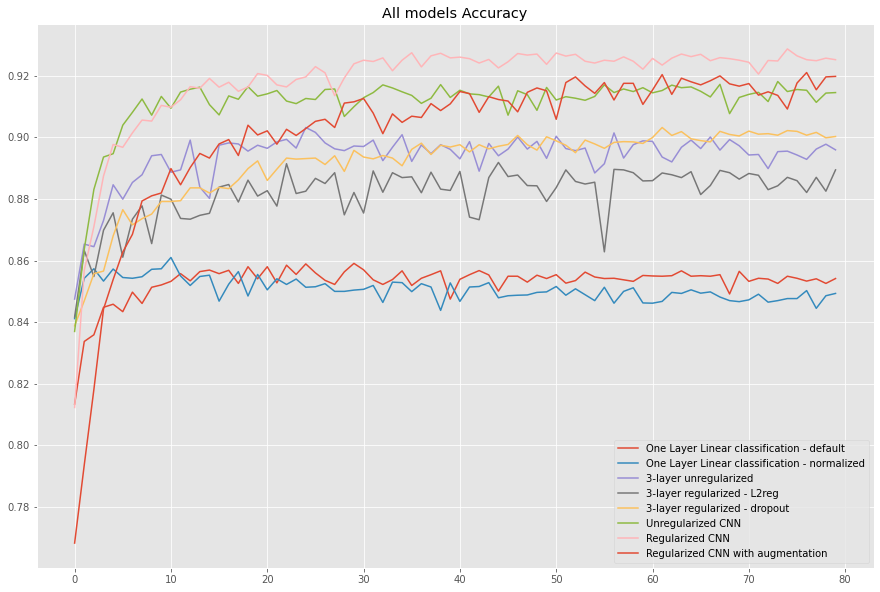

In [47]:
all_model_plot(all_models_val_acc, all_labels, 'All models Accuracy')


In [ ]:
# --------------------------------------------------------

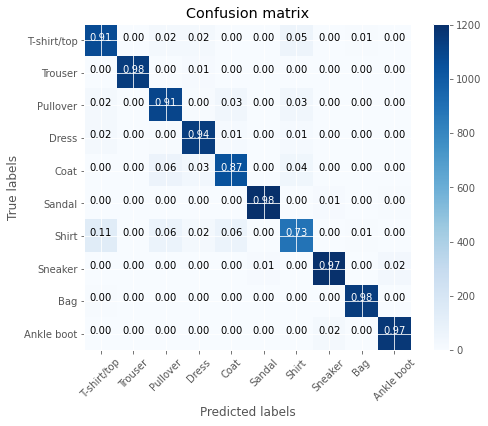

In [24]:
# plot confusion matrix of the best performing model
plotting.plot_confusion_matrix(confusion_matrix(val_label6, val_predicted6), classes, title='Confusion matrix', cmap=cmap, normalize=True)

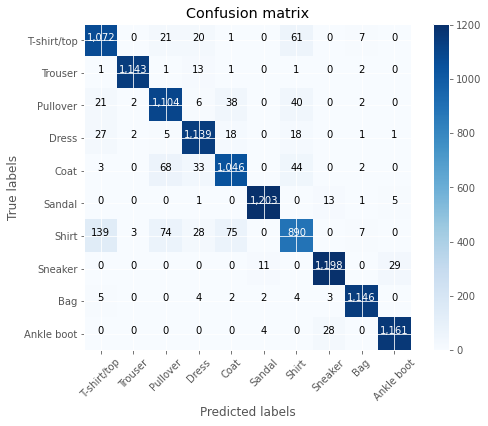

In [25]:
# plot confusion matrix of the best performing model
plotting.plot_confusion_matrix(confusion_matrix(val_label6, val_predicted6), classes, title='Confusion matrix', cmap=cmap, normalize=False)